In [17]:
import pyqsp
from pyqsp.LPoly import *
from pyqsp.gadgets import *
import jax
import jax.numpy as jnp
import numpy as np
from tqdm.notebook import tqdm
from scipy.interpolate import approximate_taylor_polynomial
from matplotlib import pyplot as plt
import copy

In [18]:
# Defines two atomic gadget

Xi_1 = [np.array([0, 1, 2, -2, 1, 0])]
S_1 = [[0, 1, 0, 1, 0]]
G = AtomicGadget(Xi_1, S_1, label="G")

Xi_2 = np.array([[np.pi/3, np.pi/2, 0, -0, -np.pi/2, -np.pi/3]])
S_2 = [[0, 1, 0, 1, 0]]
G_tilde = AtomicGadget(Xi_2, S_2, label="G_tilde")

In [19]:
# Performs an interlink of the G gadget with the extraction gadget. Note that 20 is the 
# degree of the polynomial used in the correction. If it were instead "None" no correction
# would be applied

G_interlink = G.interlink(G_tilde, [
    (('G1', 0), ('G_tilde', 0), 4)
])

In [20]:
print("In legs = {}".format(G_interlink.in_labels))
print("Out legs = {}".format(G_interlink.out_labels))

In legs = [('G', 0), ('G', 1), ('G_tilde', 1)]
Out legs = [('G_tilde', 0), ('G', 0)]


In [21]:
# Gets the sequence of a leg of the gadget interlink
G_interlink.get_sequence(('G', 0))

In [23]:
# Performs tests of the extraction and sqrt gadgets
G_extraction = ExtractionGadget(29, 'G_ext')
G_sqrt = SqrtGadget(40, 0.05, 'G_sqrt')

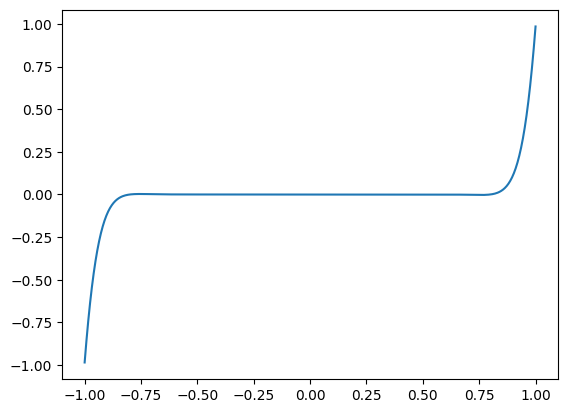

In [24]:
# Plots the response function of the extraction gadget
X, Y = G_extraction.get_response()
plt.plot(X, Y)

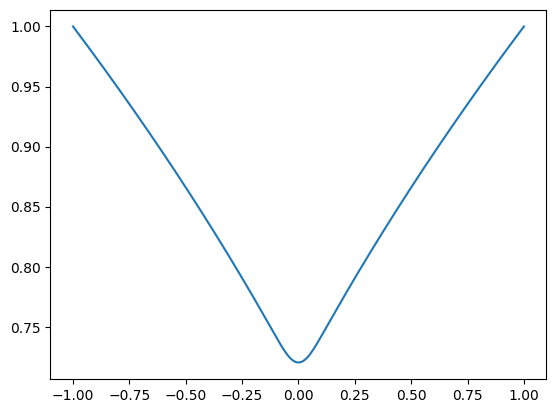

In [25]:
# Gets the response function of the sqrt gadget
X, Y = G_sqrt.get_response()
plt.plot(X, Y)